In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality/winequalityN.csv


**Importing important libraries**

In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#from sklearn.model_selection
import numpy as np
from collections import Counter
import collections
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [4]:
df2=pd.read_csv('../input/wine-quality/winequalityN.csv')
df2.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df2=df2.drop(['type'],axis=1)

In [5]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
df2.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6487 non-null   float64
 1   volatile acidity      6489 non-null   float64
 2   citric acid           6494 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6488 non-null   float64
 9   sulphates             6493 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [6]:
df2.isnull().values.any()

True

In [7]:
df2=df2.dropna()

**Countplot**

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

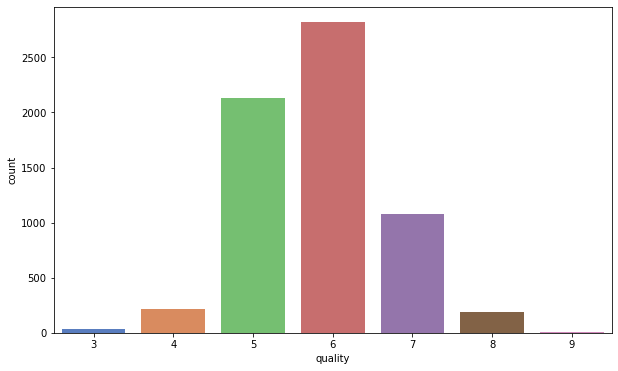

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(df2["quality"], palette="muted")
df2["quality"].value_counts()

**Box Plot**

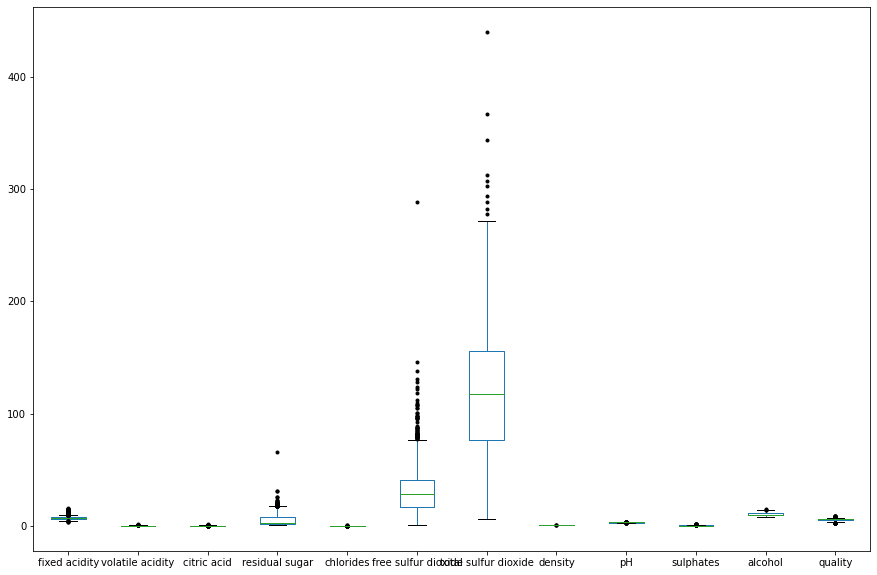

In [10]:
df2.plot.box (sym='k.',figsize=(15,10))
plt.show ()

In [11]:
quality = df2["quality"].values
category = []
for num in quality:
    if num < 5.5:
        category.append("Low")
    else:
        category.append("High")


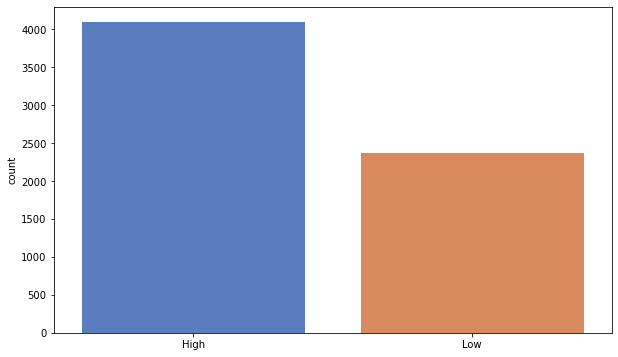

In [12]:
[(i, category.count(i)) for i in set(category)]
plt.figure(figsize=(10, 6))
sns.countplot(category, palette="muted")

**Heatmap**

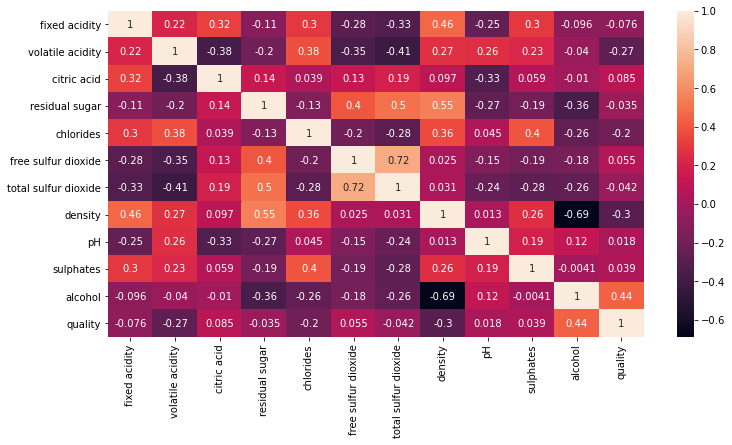

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(df2.corr(), annot=True)

**Histogram**

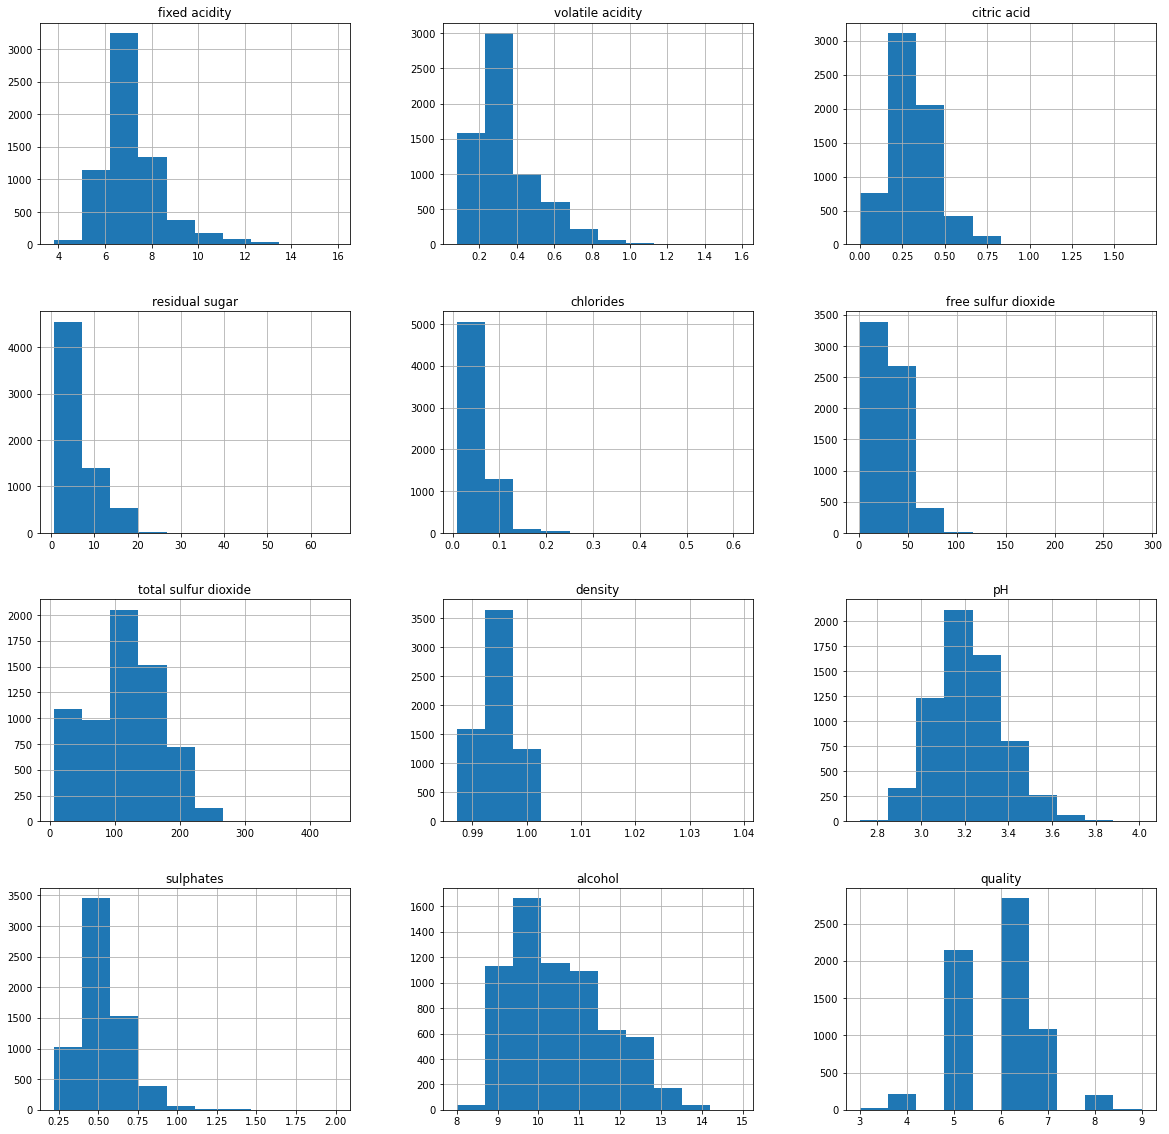

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
df2.hist (bins=10,figsize=(20,20))
plt.show ()

**Pairplot**

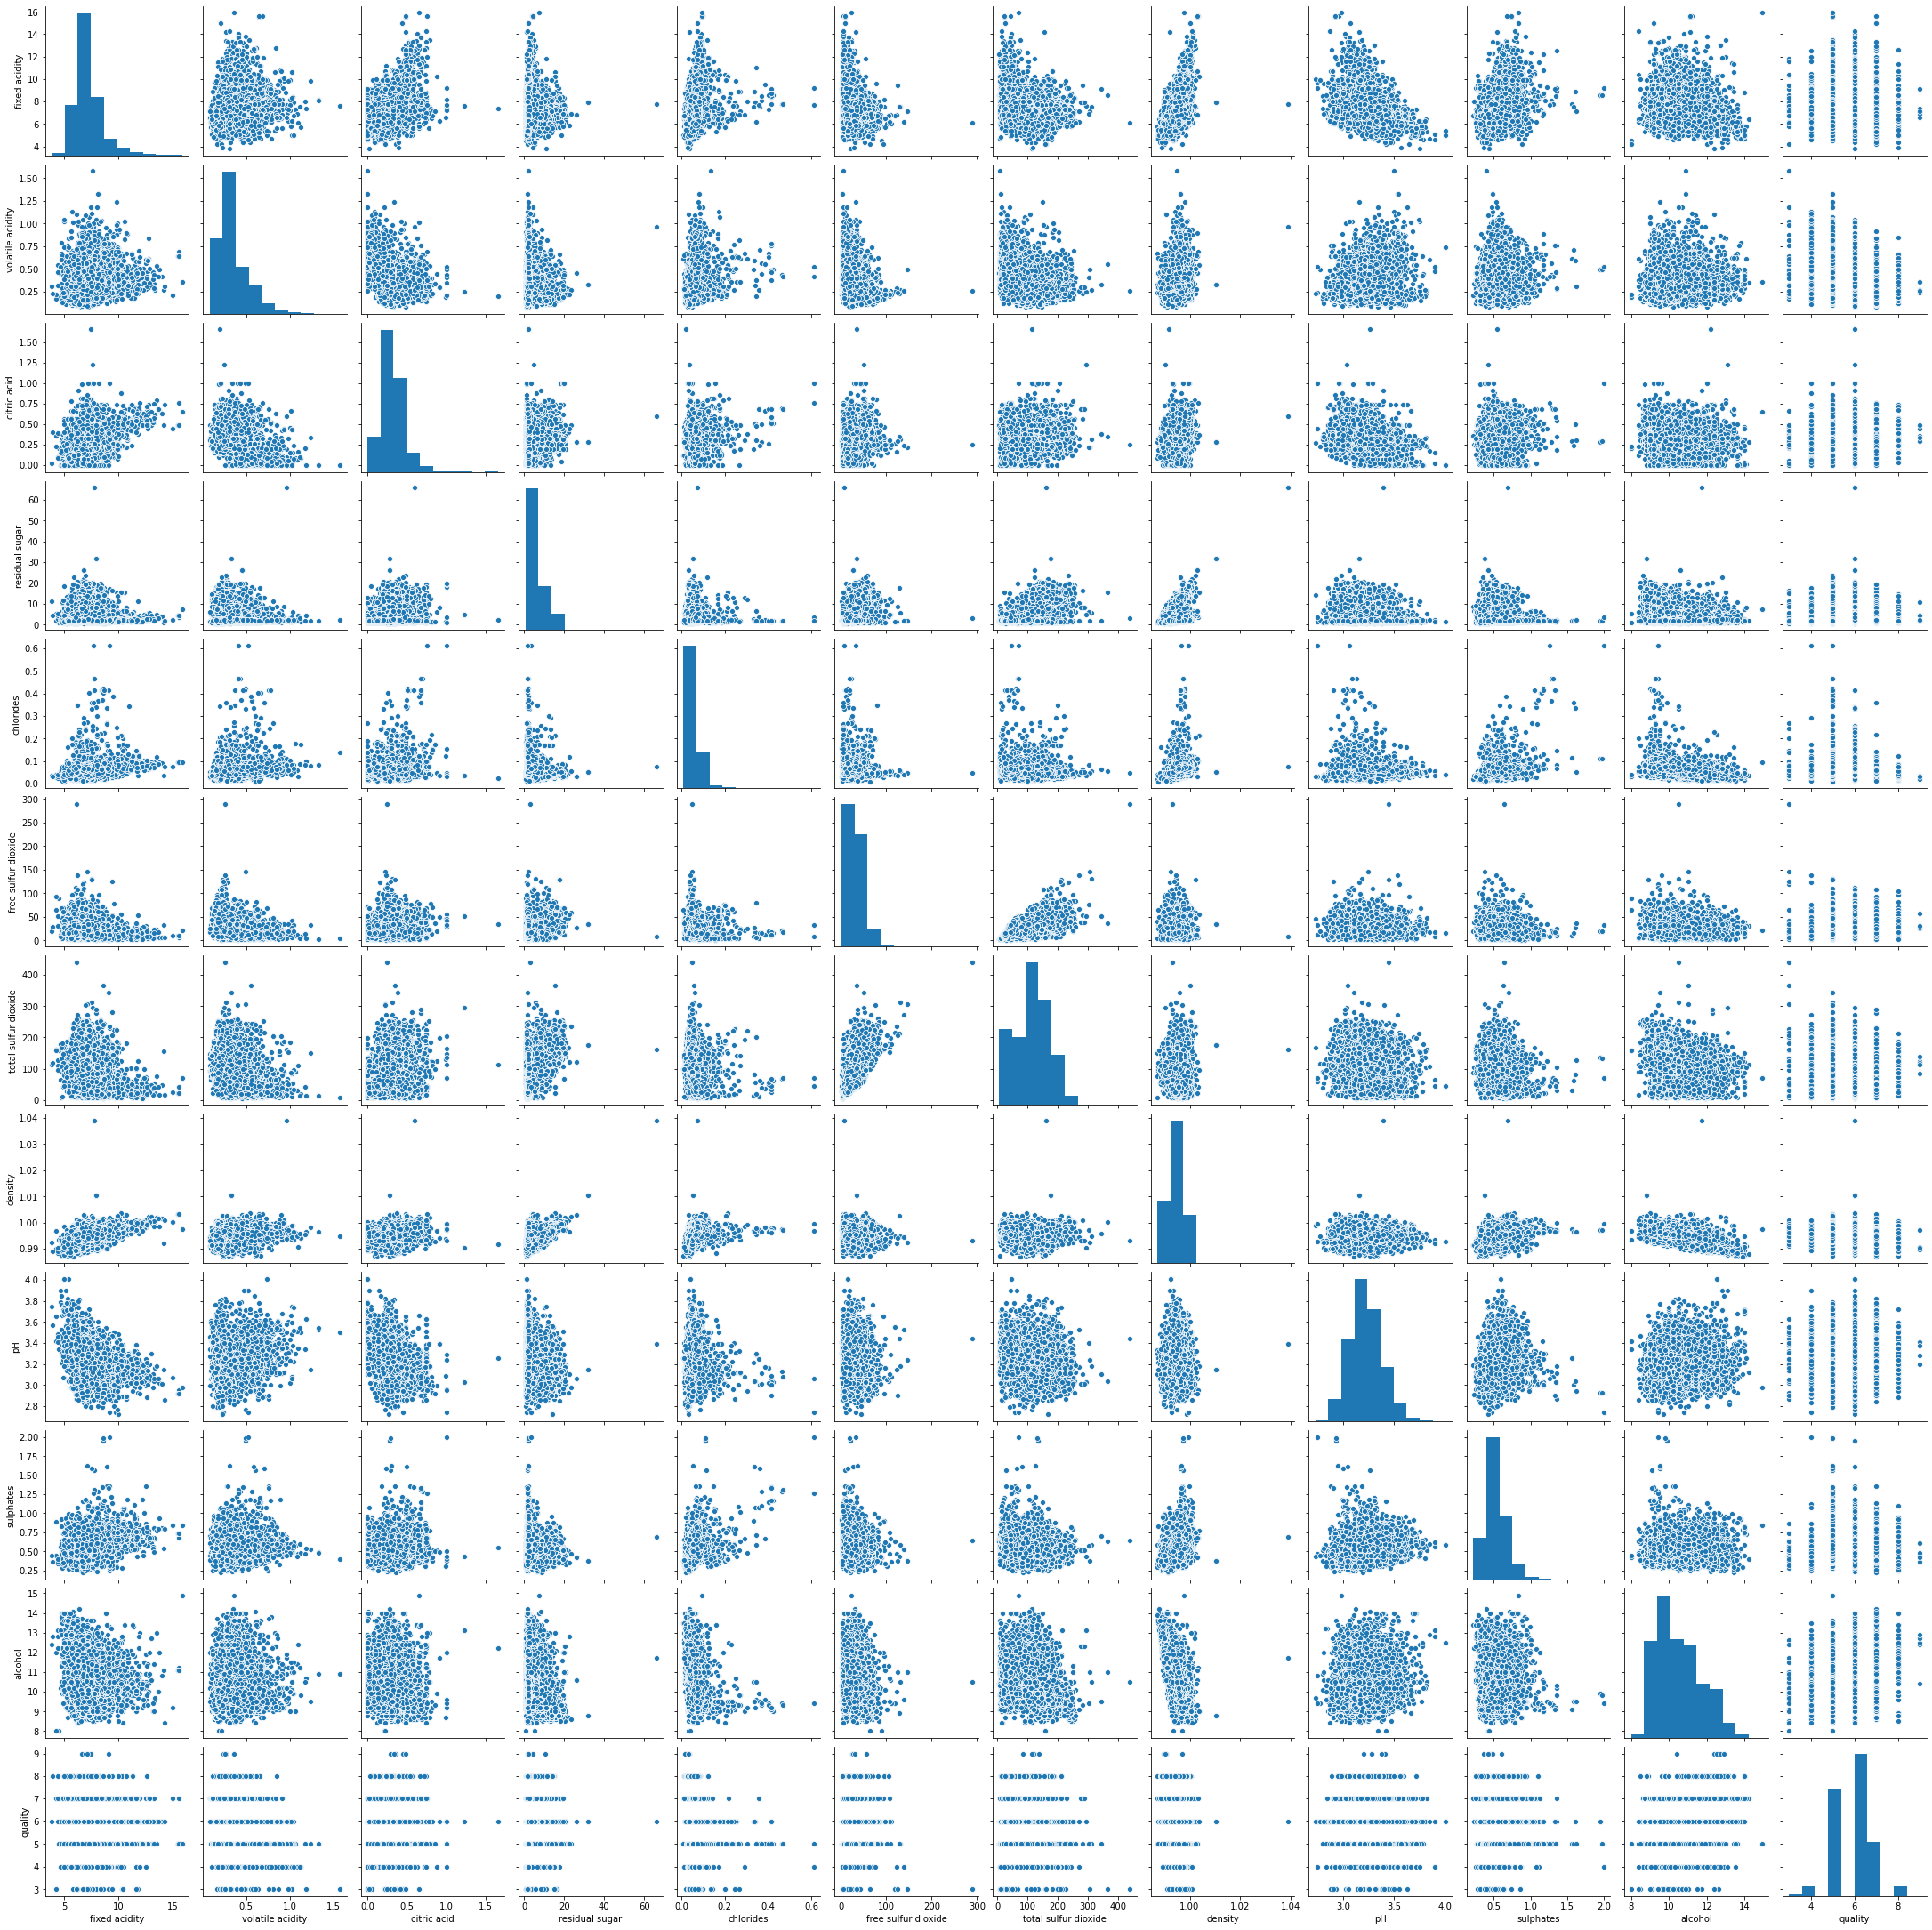

In [17]:
sns.pairplot(df2)

**Train test split**

In [16]:
features=df2.columns
features=features.drop(['quality'])
x=df2 [features]
y=df2 ['quality']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

**Stratified K-Fold Cross Validation**
In some cases, there may be a large imbalance in the response variables. For example, in dataset concerning price of houses, there might be large number of houses having high price. Or in case of classification, there might be several times more negative samples than positive samples. For such problems, a slight variation in the K Fold cross validation technique is made, such that each fold contains approximately the same percentage of samples of each target class as the complete set, or in case of prediction problems, the mean response value is approximately equal in all the folds. This variation is also known as Stratified K Fold.

In [24]:
seed=7
models = []
models.append(('RF',RandomForestClassifier()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('SVM',SVC()))
models.append(('LR',LogisticRegression()))
models.append(('NB',GaussianNB()))
# Evaluating each models in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.655041 (0.018595)
DTC: 0.574167 (0.021607)
SVM: 0.435726 (0.023082)
LR: 0.468535 (0.025493)
NB: 0.454502 (0.013782)


**1.Logistic Regression**

In [19]:
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)
print(classification_report(y_test,y_pred))
accuracy1=logistic.score(x_test,y_test)
print (accuracy1*100,'%')

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        45
           5       0.47      0.42      0.44       532
           6       0.47      0.74      0.57       711
           7       0.37      0.03      0.05       268
           8       0.00      0.00      0.00        51

    accuracy                           0.47      1616
   macro avg       0.22      0.20      0.18      1616
weighted avg       0.42      0.47      0.41      1616

46.78217821782179 %


**2.SVM**

In [20]:
classifier=SVC()
classifier.fit(x_train,y_train)
svm_predict=classifier.predict(x_test)
print(classification_report(y_test,svm_predict))
accuracy2=classifier.score(x_test,y_test)
print(accuracy2*100,'%')

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        45
           5       0.46      0.11      0.18       532
           6       0.44      0.93      0.60       711
           7       0.00      0.00      0.00       268
           8       0.00      0.00      0.00        51

    accuracy                           0.44      1616
   macro avg       0.15      0.17      0.13      1616
weighted avg       0.35      0.44      0.32      1616

44.43069306930693 %


**3.Random forest classifier**

In [21]:
ran_class=RandomForestClassifier()
ran_class.fit(x_train,y_train)
ran_predict=ran_class.predict(x_test)
print(classification_report(y_test,ran_predict))
accuracy3=ran_class.score(x_test,y_test)
print(accuracy3*100,'%')

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.55      0.13      0.21        45
           5       0.73      0.72      0.73       532
           6       0.68      0.81      0.74       711
           7       0.69      0.56      0.62       268
           8       0.81      0.25      0.39        51

    accuracy                           0.70      1616
   macro avg       0.58      0.41      0.45      1616
weighted avg       0.69      0.70      0.68      1616

69.74009900990099 %


4.Naive Bayes

In [22]:
nvclass=GaussianNB()
nvclass.fit(x_train,y_train)
y_pr=nvclass.predict(x_test)
print(classification_report(y_test,y_pr))
accuracy4=nvclass.score(x_test,y_test)
print(accuracy4*100,'%')

              precision    recall  f1-score   support

           3       0.14      0.11      0.12         9
           4       0.11      0.13      0.12        45
           5       0.57      0.46      0.51       532
           6       0.46      0.47      0.47       711
           7       0.34      0.48      0.39       268
           8       0.29      0.04      0.07        51
           9       0.00      0.00      0.00         0

    accuracy                           0.44      1616
   macro avg       0.27      0.24      0.24      1616
weighted avg       0.46      0.44      0.44      1616

44.43069306930693 %


**5.Decision tree classifier**

In [23]:
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))
accuracy5=model1.score(x_test,y_test)
print(accuracy5*100,'%')

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.21      0.22      0.22        45
           5       0.64      0.67      0.65       532
           6       0.65      0.64      0.64       711
           7       0.54      0.53      0.53       268
           8       0.34      0.31      0.33        51
           9       0.00      0.00      0.00         0

    accuracy                           0.60      1616
   macro avg       0.34      0.34      0.34      1616
weighted avg       0.60      0.60      0.60      1616

60.396039603960396 %
